**Time-resolved High-precision Data Analysis with HST/WFC3**

Yifan Zhou (UT Austin) and Daniel Apai (U Arizona)

This activity has the following learning goals:
    * Basics of HST/WFC3 data and calibration images
    * Fundamental observing modes: staring, scanning
    * Fitting transits to reduced data
    * Importance of the charge trapping effect
    * Reduced transit spectrum       

**The Hubble Space Telescope and its Wide Field Camera 3**

We will add here a brief description of HST's relevance for time-domain observations, perhaps a photo of the telescopes, and then a few sentences about WFC3 and its fundamental modes.

**Task 1: Basics of HST/WFC3 Data**

In this task we will explore science integrations and calibration data for HST/WFC3. In its commonly used imaging mode HST can take non-dispersed (aks "direct") images of its field of view. In spectrally dispersed mode ...

HST/WFC3 is using a grism to obtain slitless spectra: this means ...




In this task you will match four images taken with WFC3 with their descriptions and purpose.
Inspect the four images carefully.

![](Figures/Task1.pdf)

*Show Images for*
* Staring mode observation of a brown dwarf? (or TRAPPIST-1) with other sources in the field
* Scanning mode slitless spectra for TRAPIST-1
* Direct image of a field 
* Calibration File: sky frame/flat field
* ~Calibration file: bad pixel map / map of cosmic rays?~

*Show labels*

*Show Purposes*
A) Science data for target identification or photometric measurement
B) Science data for high-precision spectrophotometric measurement of bright sources
C) Science data for spectroscopic or spectrophotometric observations of faint sources
D) Calibration data to correct for sensitivity variations across the detector
E) Calibration data identifying unreliable pixels



**Task 2 Interpreting slitless grism image**

In this task we will interpret the slitless spectrum image of a field including the target and bright sources and a spatially scanned specxtr

2a) The image below shows a starfield with a very cool brown dwarf in it. Inspect the image, identify the spatial directions as well as the direction of spectral dispersion. Which direction points toward the shorter wavelengths? Which target may be the brown dwarf and why? 

*2b) Interpreting scanning-mode images*
Inspect the image below. This image is a XXX second long exposure with HST/WFC3 targeting TRAPPIST-1. During the exposure the planet TRAPPIST-1?? began transiting its host star. Although not visible on this image without analysis, the data record this event. Discuss how to interpret this image and how is the transit ingress encoded in it. What do the X/Y directions and pixel intensity correspond to on this image? How could the transit be detected in this image? How could the spectra of the star be derived from the image? How does this image encode the transiting planet's transmission spectrum? 

**Task 3: Charge Trapping Effect Demo**

In this task we will explore the origin and importance of the charge trapping effect and how it impacts raw integrations with HST/WFC3.
Yifan: please include here what you have.

# Charge Trapping and Ramp effect in HST/WFC3

Following is a demonstration of RECTE, a physically-motivated model for the charge trapping/ramp effect. 

Ramp effect is the most prominent systematics for WFC3/IR detector (as well as other HgCdTe based detectors) in the time-series observation mode. It appears as an exponential ($\sim1-\exp(-t)$) shaped light curve. The typcial amplitude for the ramp is on the order of 1% in the first orbit and reduces to less than 0.5% for the subsequent orbit. Ramp effect systematics removal is critical for accurately measuring transit depths and spectra for transitting exoplanets

In Zhou et al. (2017), we consider the charge trapping processes in the WFC3/IR detector and created RECTE. The essense of RECTE is that a fraction of stmulated charges (by incoming radiation) are trapped by in the detector rather than being detected due to detector defects.

In the following demonstration, you can adjust the charge trapping related parameters, and see how these parameters affect the outcome of the observations.

## Charge Trapping Processes
RECTE model assumes two populations of charge traps. The two populations are distinguished by their typical trapping timescales ($\tau$). The *slow* traps release the trapped charges at a much longer timescales than the *fast* traps ($\tau_\mathrm{s} >> \tau_\mathrm{f}$). For each trap population, the charge trapping processes are controlled by three parameters (the parameter names used in the python script are in the parenthesis):
* The numbers of traps (`nTrap_s, nTrap_f`)
* Trapping efficiencies (`eta_s, eta_f`)
* Trap lifetimes/timescales (`tau_s, tau_f`)

These parameters determines different aspects of the ramp effect profiles. Roughly speaking, given a specific fluence intensity, the numbers of traps determine how fast the ramp rises (fewer traps, faster rising); trapping efficiencies determine the amplitude of the ramp; trap lifetimes determine the difference of the observed fluxe between the end of one orbit and the beginning of the next. Fast traps have stronger effect at the beginning of each orbits. Slow traps have stronger overall effect, especially at the latter part of each orbit.

Following script creates an interactive plot that demonstrate how each model parameter affects the ramp profile. You can adjust these parameters using the widgets under the plot. The output ramp profile will change accordingly. You can also change the `crate` or `exptime` parameter to adjust the fluence rate and exposure time.

<IPython.core.display.Javascript object>


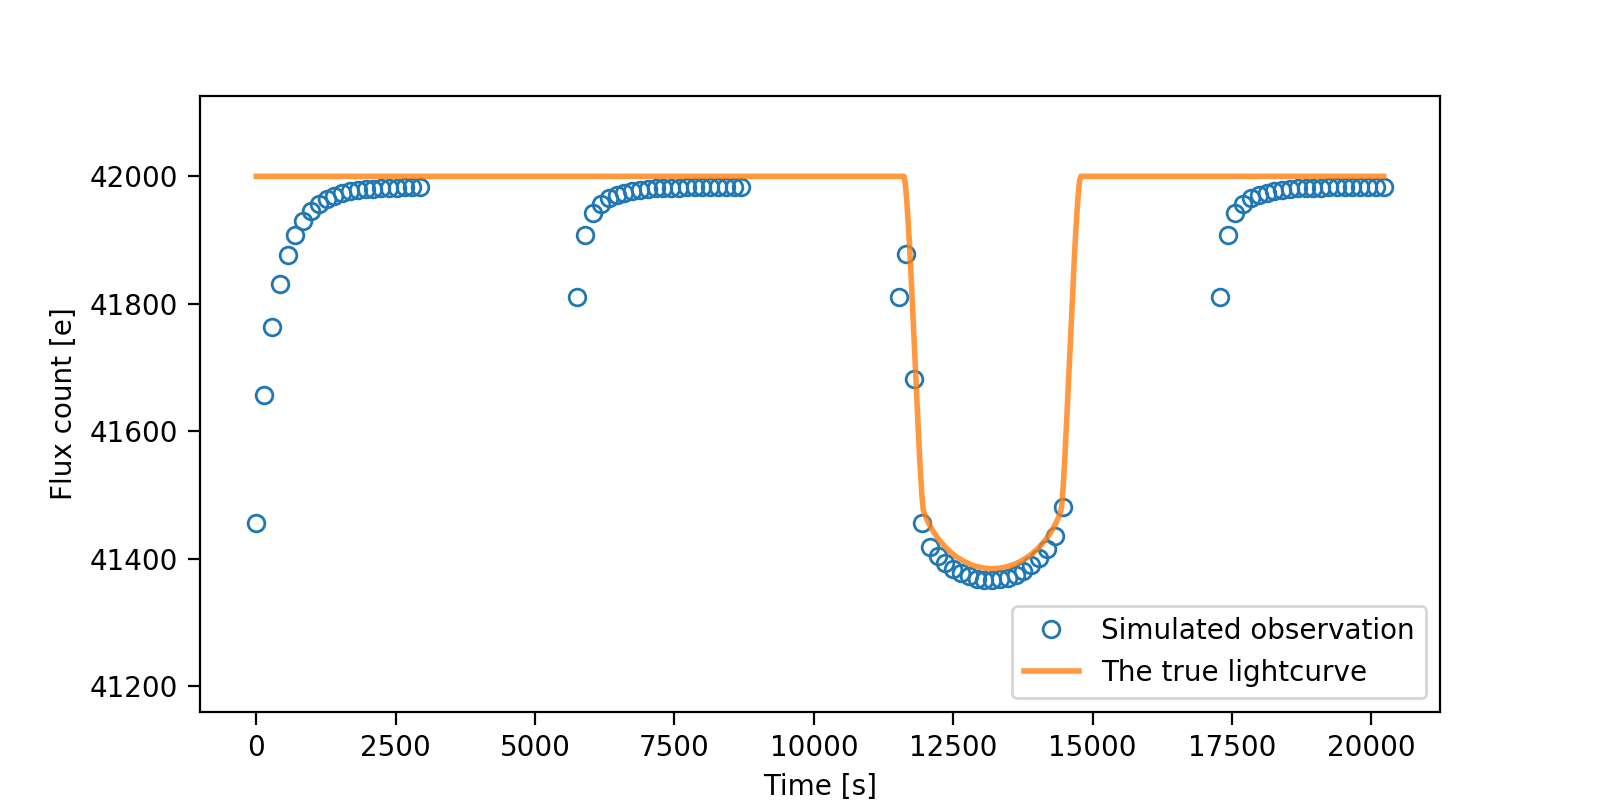

interactive(children=(FloatText(value=1500.0, description='Number of slow charge traps', layout=Layout(width='…

In [37]:
import ipywidgets as widgets
from ipywidgets import interactive, HBox, Label
import matplotlib.pyplot as plt
import numpy as np
from codes.ramp_demonstration1 import rampModelPlot
layout = {'width': '500px'}
style = {'description_width': '50%'}
%matplotlib notebook


# create interactive widgets
trap_s = widgets.FloatText(min=1000, max=3000, value=1500, step=100,
                          description='Number of slow charge traps',
                          layout=layout, style=style)
trap_f = widgets.FloatText(min=50, max=500, value=300, step=50,
                           description='Number of fast charge traps',
                          layout=layout, style=style)
eta_s = widgets.FloatText(min=0.005, max=0.02, value=0.012, step=0.001,
                           description='Trapping $\eta$ of slow charge traps',
                         layout=layout, style=style)
eta_f = widgets.FloatText(min=0.001, max=0.01, value=0.005, step=0.001,
                           description='Trapping $\eta$ of fast charge traps',
                         layout=layout, style=style)
tau_s = widgets.FloatText(min=6000, max=30000, value=15000, step=2000,
                           description='Trap lifetime of slow charge traps',
                         layout=layout, style=style)
tau_f = widgets.FloatText(min=50, max=500, value=200, step=50,
                           description='Trap lifetime of fast charge traps',
                         layout=layout, style=style)

plt.figure(figsize=(8, 4))

# make interactive plot
interactive_plot = interactive(rampModelPlot,
                               nTrap_s=trap_s,
                               eta_s=eta_s,
                               tau_s=tau_s,
                               nTrap_f=trap_f,
                               eta_f=eta_f,
                               tau_f=tau_f,
                               continuous_update=False)

# adjust details of the plot
output = interactive_plot.children[-1]
output.layout.height = '350px'
output.layout.width = '100%'
# run the interactive plot
interactive_plot


## Ramp Correction Demonstrations
The six parameters described above stays rather constant among different observations. What determines the ramp profiles are the initial states of the charge trap status. Additionally trapped charges during the earth occulation also affects the ramp profiles. The initial stats and additional trapped charges are controlled by parameters `trap_pop_s`, `trap_pop_f`, `dTrap_s`, and `dTrap_f`. When correcting ramp effect in the observed light curves, these parameters need to be fit so that the model can match the observed light curves.

These parameters can be adjusted in the following intercative plot. Try adjusting these four parameters so that the circles can fit to the curve in solid line.

<IPython.core.display.Javascript object>


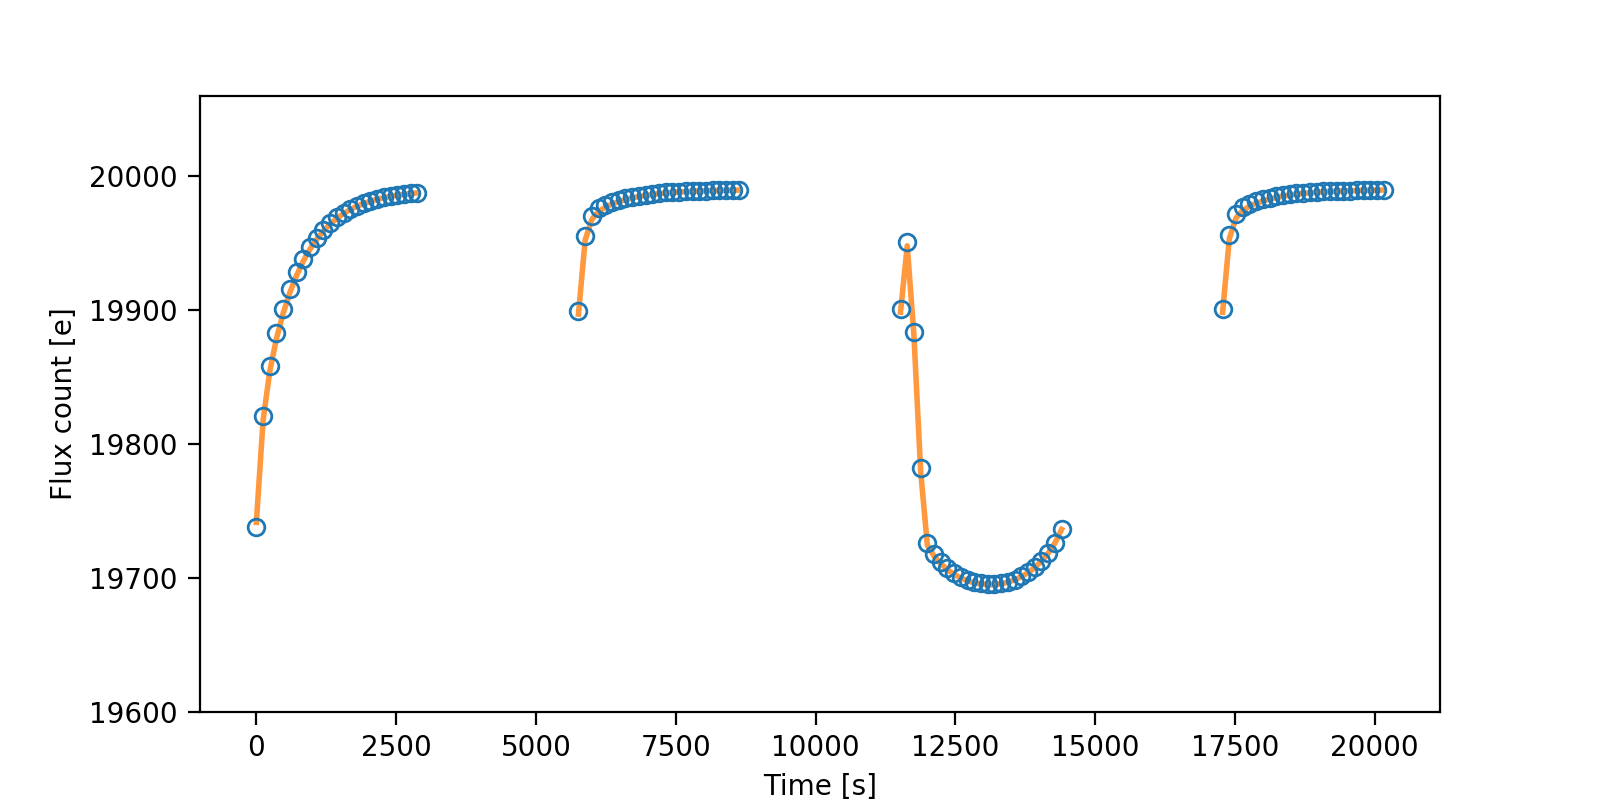

interactive(children=(FloatSlider(value=50.0, description='Initially trapped slow charges', layout=Layout(widt…

In [42]:
from codes.ramp_demonstration2 import rampCorrectionPlot
layout = {'width': '500px'}
style = {'description_width': '50%'}

trap_pop_s = widgets.FloatSlider(min=0, max=500, value=50, step=50, 
                                 description='Initially trapped slow charges',
                                 layout=layout, style=style)
trap_pop_f = widgets.FloatSlider(min=0, max=100, value=10, step=10, 
                                 description='Initially trapped fast charges',
                                 layout=layout, style=style)
dTrap_s = widgets.FloatSlider(min=0, max=500, value=0, step=50, 
                              description='Additionally trapped slow charges',
                              layout=layout, style=style)
dTrap_f = widgets.FloatSlider(min=0, max=100, value=0, step=10, 
                              description='Additionally trapped fast charges',
                              layout=layout, style=style)

plt.figure(figsize=(8, 4))
interactive_plot = interactive(rampCorrectionPlot,
                               trap_pop_s=trap_pop_s,
                               trap_pop_f=trap_pop_f,
                               dTrap_s=dTrap_s,
                               dTrap_f=dTrap_f,
                               continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

**TASK 4: Fit transit model with Charge-Trapping corrections**

In this task we will use the batman package to fit a transit to the lightcurve extracted from the direct images. You will fit the transit model to data before and after charge trap correction to understand the importance of systematics.

**Transit Spectrum**

End with the spectrum, final product
Explain out-of-transit spectra vs. in-transit spectrum

# RECTE Demonstrations with TRAPPIST-1 Observations
This Jupyter notebook demonstrates how to use RECTE to remove ramp effect systematics in the HST/WFC3 light curves. We apply RECTE correction to the TRAPPIST-1 observations (firstly published in De Wit et al. 2016). Results in this demosntration were published in Zhang et al. (2018).

## Light curve Preparations
The light curve for each wavelength channel needs to be extracted from the observation ima frame before applying the RECTE correction (or any other types of ramp effect correction). The reference for this procedures is Deming et al. (2013). Light curves were pre-calculated for this demonstration and stored in  a python shelve file. 

We first plot the extracted light curves, without applying any correction. The characteristic ramp is visible in every light curve. These ramps have stronger amplitude at the first orbits of the observations. We can see some other features in these ligth curves:  
1. Except for the first orbit light curves, the HST-orbital-variations of the ramp systematics are still visible. Comparing the light curves for the second orbit and that for the last orbit, the ramp amplitudes for the second orbit are stronger. This features shows the process of charge trapping lasting through the entire observations, especially for a faint host star such as TRAPPIST-1.
2. Channel-variation of the the ramp systematics are also visible. TRAPPIST-1, being an M8 star, has a signficant 1.4 $\mu$m water feature in its 1.1 to 1.7 $\mu$m spectrum. This water feature introduces flux intensity variations between channels. From the charge trapping perspective, flux intensity variations lead to different charge trapping rate between different channels, and thus differnt ramp profiles.
RECTE model considers these aspects in the corrections and provides a physically-motivated solution.

In [46]:
%run codes/plotUncorrectedLightCurve

<bound method Mapping.keys of <shelve.DbfilenameShelf object at 0x11bd720d0>>


KeyError: b'ERRmat'

# RECTE corrections
We will use the convenience functions from the `RECTECorrector` module to make corrections. Two functions `RECTECorrrector1` and `RECTECorrector2` are for corrections for single-directional scanning or "round-trip" scanning observations, respectively. The observation used in this demonstration was done using "round-trip" scanning mode. Therefore, we use `RECTECorrector2` function to make the correction.

`RECTECorrector2` function fits RECTE model profiles to the observed light curves. It uses `lmfit` to perform the optimization. It excludes the orbits where transits/eclipses occur. But this function can be easily combined with transit model (such as `batman`) to include orbits of transits/eclipses in fitting calculations. `lmfit` can also be changed by MCMC sampler (such as `emcee`) to return more informative fitting results.

In the following, we write a wrapper function `removeRamp` to get the systematics-removed light curves

In [60]:
import pandas as pd
import numpy as np

from RECTE import RECTE
from lmfit import Parameters, Model
from RECTECorrector import RECTECorrector2

def removeRamp(p0,
               time,
               LCArray,
               ErrArray,
               orbits,
               orbits_transit,
               expTime,
               scanDirect):
    """
    remove Ramp systemetics with RECTE
    
    :param p0: initial parameters
    :param time: time stamp of each exposure
    :param LCArray: numpy array that stores all light curves
    :param ErrArray: light curve uncertainties
    :param orbits: orbit number for each exposure
    :param orbits_transit: orbit number that transits occur. These orbits 
    are excluded in the fit
    :param expTime: exposure time
    :param scanDirect: scanning direction for each exposure. 0 for forward, 
    1 for backward
    """
    nLC = LCArray.shape[0]  # number of light curves
    correctedArray = LCArray.copy()
    correctedErrArray = ErrArray.copy()
    modelArray = LCArray.copy()
    crateArray = LCArray.copy()
    slopeArray = LCArray.copy()
    p = p0.copy()
    for i in range(nLC):
        correctTerm, crate, bestfit, slope = RECTECorrector2(
            time, 
            orbits, 
            orbits_transit, 
            LCArray[i, :], 
            p, 
            expTime, 
            scanDirect)
        # corrected light curve/error are normalized to the baseline
        correctedArray[i, :] = LCArray[i, :] / correctTerm / (crate)
        correctedErrArray[i, :] = ErrArray[i, :] / correctTerm / (crate)
        modelArray[i, :] = bestfit
        crateArray[i, :] = crate
        slopeArray[i, :] = slope
    return correctedArray, correctedErrArray, modelArray, crateArray, slopeArray

infoFN = 'codes/TRAPPIST_Info.csv'
info = pd.read_csv(infoFN)
grismInfo = info[info['Filter'] == 'G141']
scanDirect = grismInfo['ScanDirection'].values
p = Parameters()
p.add('trap_pop_s', value=0, min=0, max=200, vary=True)
p.add('trap_pop_f', value=0, min=0, max=100, vary=True)
p.add('dTrap_f', value=0, min=0, max=200, vary=True)
p.add('dTrap_s', value=50, min=0, max=100, vary=True)
LCarray_noRamp, ERRarray_noRamp, Modelarray, cratearray, slopearray = removeRamp(
    p, 
    time, 
    LCarray, 
    ERRarray, 
    orbit, 
    orbit_transit,
    expTime,
    scanDirect)

FileNotFoundError: [Errno 2] File ./demonstration_data/TRAPPIST_Info.csv does not exist: './demonstration_data/TRAPPIST_Info.csv'

Now, ramp systemetics are removed from the observations.

## Result plot
### Best-fit Models

In [ ]:
fig2 = plt.figure(figsize=(10, 6))
ax1 = fig2.add_subplot(211)

ax1.errorbar(
    time / 3600,
    LCarray[1, :],
    yerr=ERRarray[1, :],
    fmt='.',
    ls='')
for o in [0, 1, 3]:
    ax1.plot(
        time[orbit == o] / 3600,
        Modelarray[1, orbit == o],
        '.-',
        color='C1')
ax1.set_title('Light curve for Channel 2 ($\lambda_c$={0:.2} micron)'.format(wavelength[1]))
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Fluence [e]')

ax2 = fig2.add_subplot(212)
ax2.errorbar(
    time / 3600,
    LCarray[6, :],
    yerr=ERRarray[6, :],
    fmt='.',
    ls='')
for o in [0, 1, 3]:
    ax2.plot(
        time[orbit == o] / 3600,
        Modelarray[6, orbit == o],
        '.-',
        color='C1')
ax2.set_title('Light curve for Channel 6 ($\lambda_c$={0:.2} micron)'.format(wavelength[6]))
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Fluence [e]')
fig2.tight_layout()

### Corrected light curves

In [ ]:
fig3 = plt.figure(figsize=(10, 6))
ax1 = fig3.add_subplot(211)

ax1.errorbar(
    time / 3600,
    LCarray_noRamp[1, :],
    yerr=ERRarray_noRamp[1, :],
    fmt='.',
    ls='')
ax1.set_title('Light curve for Channel 2 ($\lambda_c$={0:.2} micron)'.format(wavelength[1]))
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Fluence [e]')

ax2 = fig3.add_subplot(212)
ax2.errorbar(
    time / 3600,
    LCarray_noRamp[6, :],
    yerr=ERRarray_noRamp[6, :],
    fmt='.',
    ls='')

ax2.set_title('Light curve for Channel 6 ($\lambda_c$={0:.2} micron)'.format(wavelength[6]))
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Fluence [e]')
fig3.tight_layout()